<a href="https://colab.research.google.com/github/4362725Gb/ml-zoomCamp2024/blob/main/08-deep-learning/08-fashion_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

In [4]:
pwd

'/content'

Loading dataset data

In [2]:
# !git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

In [5]:
ls

drive/  sample_data/


In [6]:
path = '/content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/train/t-shirt'
name = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname , target_size=(299, 299))

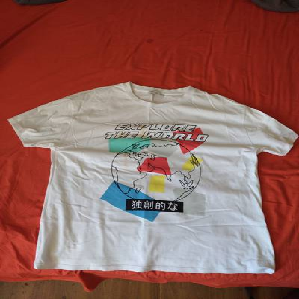

In [7]:
img

In [ ]:
np.array(img).shape

(95, 95, 3)

In [ ]:
np.array(img)[0][0]

array([105,  21,  11], dtype=uint8)

showing a strip of picture

In [ ]:
display(Image.fromarray (np.array(img)[50:60].reshape(10,95,3),'RGB'))

In [8]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [9]:
model = Xception( weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
X = preprocess_input(X)

In [11]:
X[0].shape

(299, 299, 3)

In [12]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [13]:
pred.max()

0.8878358

In [14]:
np.argmax(pred)

610

In [15]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.8878358),
  ('n03710637', 'maillot', 0.0068345093),
  ('n04456115', 'torch', 0.006463616),
  ('n02730930', 'apron', 0.0059278444),
  ('n04235860', 'sleeping_bag', 0.0054279016)]]

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/train' ,
    target_size=(150,150),
    batch_size=32
)

In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [42]:
cd /content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/train

/content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/train


In [43]:
ls -l

total 40
drwx------ 2 root root 4096 Dec  1 08:03 dress/
drwx------ 2 root root 4096 Dec  1 08:03 hat/
drwx------ 2 root root 4096 Dec  1 08:03 longsleeve/
drwx------ 2 root root 4096 Dec  1 08:03 outwear/
drwx------ 2 root root 4096 Dec  1 08:03 pants/
drwx------ 2 root root 4096 Dec  1 08:03 shirt/
drwx------ 2 root root 4096 Dec  1 08:03 shoes/
drwx------ 2 root root 4096 Dec  1 08:03 shorts/
drwx------ 2 root root 4096 Dec  1 08:03 skirt/
drwx------ 2 root root 4096 Dec  1 08:03 t-shirt/


In [68]:
X, y = next(train_ds)

Cheking one sample target. The second class is 'hat'

In [71]:
y[24]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Checking sample records of X's, related the sample target

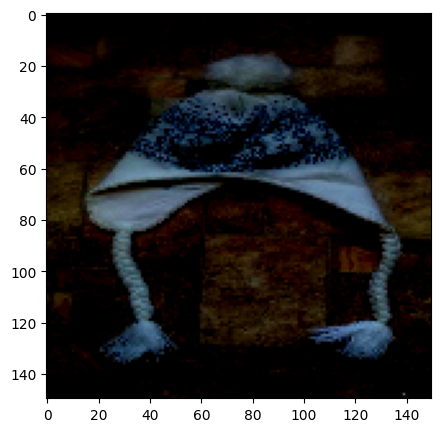

In [69]:
plt.figure(figsize=(5,5))
plt.imshow(X[24])

In [77]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/zoomcamp2024/clothing-dataset-small/validation' ,
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


Making Model

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [102]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

base_model.trainable = False

inputs = tf.keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
flatten = tf.keras.layers.GlobalAveragePooling2D()(base)
output = tf.keras.layers.Dense(10 )(flatten)
model = tf.keras.Model(inputs, output)

In [104]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [105]:
pred.shape

(32, 10)

⚠ 🤔 what does it mean?! pred > 1 !! Yes.
beacause it just initiated with random wright's  😁

In [106]:
pred[0].max(), np.argmax(pred[0])

(1.6044283, 1)

In [107]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [109]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.1302 - loss: 9.7567

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 915s 9s/step - accuracy: 0.1303 - loss: 9.7671 - val_accuracy: 0.1965 - val_loss: 9.7516
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.1606 - loss: 10.7136 - val_accuracy: 0.1760 - val_loss: 10.5980
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.1597 - loss: 10.8517 - val_accuracy: 0.1672 - val_loss: 10.9206
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 419s 4s/step - accuracy: 0.1456 - loss: 10.8598 - val_accuracy: 0.1584 - val_loss: 10.8482
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 344s 4s/step - accuracy: 0.1711 - loss: 10.9220 - val_accuracy: 0.1378 - val_loss: 10.6837
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.1441 - loss: 11.4516 - val_accuracy: 0.1437 - val_loss: 10.9208
Epoch 7/10
68/96 ━━━━━━━━━━━━━━━━━━━━ 1:30 3s/step - accuracy: 0.1548 - loss: 10.9121

KeyboardInterrupt: 